In [1]:
import numpy as np
import math
import itertools
import sys
import matplotlib.pyplot as plt
import copy

from mpl_toolkits import mplot3d
from ripser import ripser
from persim import plot_diagrams
from scipy.spatial import distance_matrix
from scipy.spatial import distance

%load_ext autoreload
%autoreload 2
import cup_quasi_periodic_detection as cqpd

In [2]:
n = 2000

np.random.seed(13)

dm_X = cqpd.gen_flat_torus(n)

# maxmin subsampling
ind_L, cover_r = cqpd.maxmin(dm_X, 70)

dm_L = dm_X[ind_L,:][:,ind_L]

In [3]:
q = 2

result = ripser(dm_L, coeff=q, distance_matrix=True, maxdim=2, do_cocycles=True)

diagrams = result['dgms']
cocycles = result['cocycles']

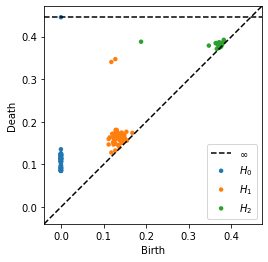

In [4]:
plot_diagrams(diagrams) 

In [5]:
H_1 = cocycles[1]
H_1_diagram = diagrams[1]
H_1_persistence = H_1_diagram[:,1] - H_1_diagram[:,0]
H_1_persistence_sort_ind = H_1_persistence.argsort()

In [6]:
print(H_1_persistence[H_1_persistence_sort_ind])

[0.0011971  0.00307749 0.00535367 0.00650649 0.00862552 0.00876534
 0.00897454 0.00983538 0.01049721 0.01196966 0.01236582 0.01363808
 0.01512603 0.02016523 0.02048351 0.02143301 0.023154   0.02316199
 0.02366647 0.02392904 0.02624187 0.02696349 0.02768628 0.02887934
 0.02924652 0.02970806 0.02986673 0.02998647 0.03086366 0.03109041
 0.03204536 0.032525   0.03348194 0.03363553 0.03486058 0.03658488
 0.03904079 0.03931771 0.03945336 0.03964558 0.03969868 0.04070598
 0.04105729 0.0419784  0.04208463 0.04211421 0.04221374 0.04267478
 0.04598612 0.04639378 0.04765322 0.04824878 0.04887836 0.04902089
 0.04980476 0.05153442 0.05282372 0.21947142 0.2221444 ]


In [7]:
H_2 = cocycles[2]
H_2_diagram = diagrams[2]
H_2_persistence = H_2_diagram[:,1] - H_2_diagram[:,0]
H_2_persistence_sort_ind = H_2_persistence.argsort()

In [8]:
cocycle_1 = H_1[H_1_persistence_sort_ind[-1]]
cocycle_2 = H_1[H_1_persistence_sort_ind[-2]]
print(cocycle_1)

[[49  7  1]
 [53 21  1]
 [53  3  1]
 [50  9  1]
 [35 28  1]
 [35  1  1]
 [37  4  1]
 [33 29  1]
 [32 18  1]
 [40 18  1]
 [49 30  1]
 [33 15  1]
 [33 20  1]
 [34 30  1]
 [58 35  1]
 [50 20  1]
 [60 28  1]
 [36 33  1]
 [28 12  1]
 [59 53  1]
 [28  7  1]
 [63 49  1]
 [53 34  1]
 [37 33  1]
 [21  9  1]
 [18 10  1]
 [18  1  1]
 [20  4  1]
 [18  4  1]
 [53 50  1]
 [40 37  1]
 [35 32  1]
 [60 49  1]
 [29  4  1]
 [30  3  1]
 [56 33  1]
 [68 50  1]
 [30 13  1]
 [65 35  1]
 [65 18  1]
 [50 45  1]
 [30 21  1]
 [13  7  1]
 [53 47  1]
 [53 49  1]
 [66 30  1]
 [57 33  1]
 [ 9  4  1]
 [57 28  1]
 [58 12  1]
 [41 35  1]
 [28 18  1]
 [58 18  1]
 [68 21  1]
 [63 34  1]
 [34  7  1]
 [49 35  1]
 [53 40  1]
 [12  1  1]
 [68 49  1]
 [28 23  1]
 [37 32  1]
 [50 37  1]
 [63 28  1]
 [12  4  1]
 [40 35  1]
 [55 49  1]
 [ 9  3  1]
 [50 30  1]
 [30 28  1]
 [37 28  1]
 [38 18  1]
 [21 20  1]
 [15  4  1]
 [40  9  1]
 [35 13  1]
 [33  2  1]
 [33 16  1]
 [50 18  1]
 [53 26  1]
 [49 22  1]
 [21 18  1]
 [59 30  1]
 [25

In [9]:
cup = cqpd.cup_product_cochains(cocycle_1, cocycle_2, q)

print(cup)

[[53, 21, 10, 1], [53, 21, 4, 1], [53, 21, 18, 1], [50, 9, 4, 1], [33, 29, 15, 1], [33, 29, 16, 1], [33, 29, 20, 1], [33, 15, 4, 1], [33, 15, 2, 1], [33, 20, 4, 1], [50, 20, 4, 1], [36, 33, 15, 1], [36, 33, 20, 1], [36, 33, 16, 1], [36, 33, 9, 1], [36, 33, 0, 1], [36, 33, 31, 1], [36, 33, 21, 1], [59, 53, 40, 1], [59, 53, 10, 1], [59, 53, 4, 1], [37, 33, 15, 1], [37, 33, 20, 1], [37, 33, 16, 1], [37, 33, 9, 1], [37, 33, 0, 1], [37, 33, 31, 1], [37, 33, 21, 1], [21, 9, 4, 1], [18, 10, 6, 1], [18, 10, 3, 1], [18, 10, 9, 1], [53, 50, 4, 1], [53, 50, 40, 1], [53, 50, 33, 1], [53, 50, 10, 1], [53, 50, 37, 1], [53, 50, 18, 1], [53, 50, 29, 1], [53, 50, 32, 1], [40, 37, 36, 1], [40, 37, 20, 1], [40, 37, 21, 1], [40, 37, 15, 1], [35, 32, 26, 1], [35, 32, 6, 1], [35, 32, 21, 1], [56, 33, 15, 1], [56, 33, 20, 1], [56, 33, 16, 1], [56, 33, 9, 1], [56, 33, 0, 1], [56, 33, 31, 1], [56, 33, 21, 1], [68, 50, 4, 1], [68, 50, 40, 1], [68, 50, 33, 1], [68, 50, 10, 1], [68, 50, 37, 1], [68, 50, 18, 1], [

In [10]:
rips_com, orders, diameters = cqpd.rips_complex(dm_L, 0.5)

In [11]:
d0 = cqpd.delta_0(rips_com['0'], rips_com['1'])
d1 = cqpd.delta_1(rips_com['1'], rips_com['2'])

In [12]:
R1, V1, low = cqpd.matrix_reduction(d1)

In [13]:
cochain = np.zeros(rips_com['2'].shape[0])

cup = np.array(cup)

for i in range(len(cup)):
    simplex = cup[i,2::-1]
    
    j = np.where((rips_com['2'] == simplex).all(axis=1))
    
    cochain[j] = cup[i,3]
    
cochain = cochain[::-1]

In [14]:
y, index = cqpd.backwards_substitution(R1, low, cochain)

In [15]:
y, index

(array([0., 0., 0., ..., 0., 0., 0.]), 24679)

In [16]:
len(rips_com['2'])-index-1

247

In [17]:
ind_goal = rips_com['2'][len(rips_com['2'])-index-1]
print(ind_goal)

[11 17 52]


In [18]:
dm_L[np.ix_(ind_goal[::-1],ind_goal[::-1])]

array([[0.        , 0.11507418, 0.13639518],
       [0.11507418, 0.        , 0.18801606],
       [0.13639518, 0.18801606, 0.        ]])

In [19]:
rips_com['2']

array([[22, 63, 68],
       [19, 61, 66],
       [27, 48, 64],
       ...,
       [29, 38, 59],
       [29, 38, 62],
       [29, 38, 65]])

In [20]:
print(dm_L[np.ix_(rips_com['2'][0], rips_com['2'][0])])
print(dm_L[np.ix_(rips_com['2'][1], rips_com['2'][1])])
print(dm_L[np.ix_(rips_com['2'][2], rips_com['2'][2])])

print(dm_L[np.ix_(rips_com['2'][-1], rips_com['2'][-1])])

[[0.         0.09759283 0.08487622]
 [0.09759283 0.         0.09934108]
 [0.08487622 0.09934108 0.        ]]
[[0.         0.10499735 0.08587942]
 [0.10499735 0.         0.08699239]
 [0.08587942 0.08699239 0.        ]]
[[0.         0.1144729  0.09195033]
 [0.1144729  0.         0.09229814]
 [0.09195033 0.09229814 0.        ]]
[[0.         0.49971572 0.44757712]
 [0.49971572 0.         0.18911507]
 [0.44757712 0.18911507 0.        ]]


In [21]:
print(dm_X[np.ix_(rips_com['1'][0], rips_com['1'][0])])
print(dm_X[np.ix_(rips_com['1'][1], rips_com['1'][1])])
print(dm_X[np.ix_(rips_com['1'][2], rips_com['1'][2])])

print(dm_X[np.ix_(rips_com['1'][-1], rips_com['1'][-1])])

[[0.         0.41311672]
 [0.41311672 0.        ]]
[[0.         0.69851295]
 [0.69851295 0.        ]]
[[0.         0.39408997]
 [0.39408997 0.        ]]
[[0.         0.34759379]
 [0.34759379 0.        ]]


In [22]:
diameters['2']

array([0.09934108, 0.10499735, 0.1144729 , ..., 0.49971572, 0.49971572,
       0.49971572])

In [23]:
rips_com['2']

array([[22, 63, 68],
       [19, 61, 66],
       [27, 48, 64],
       ...,
       [29, 38, 59],
       [29, 38, 62],
       [29, 38, 65]])

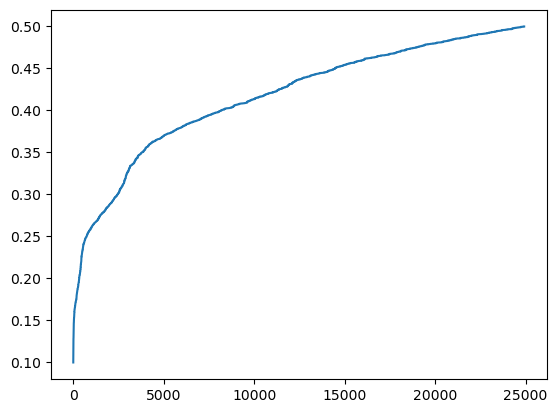

In [24]:
plt.plot(diameters['2'])

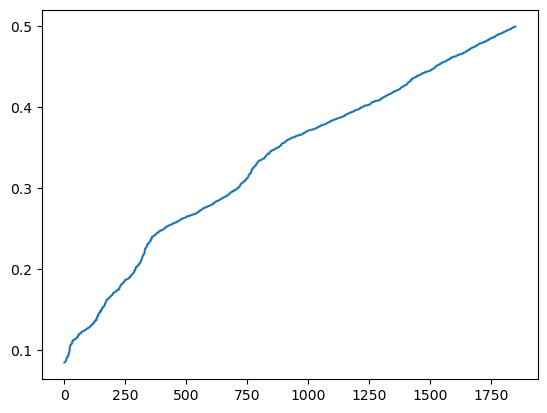

In [25]:
plt.plot(diameters['1'])

In [26]:
print(H_1_diagram[H_1_persistence_sort_ind[-1]])
print(H_1_diagram[H_1_persistence_sort_ind[-2]])

[0.11819866 0.34034306]
[0.12758005 0.34705147]


In [27]:
print(H_2_diagram[H_2_persistence_sort_ind[-1]])

[0.18801606 0.38783476]


In [28]:
H_2_diagram

array([[0.38311818, 0.38926804],
       [0.38196743, 0.39229152],
       [0.37819403, 0.38090539],
       [0.37758386, 0.38530943],
       [0.37566057, 0.38412398],
       [0.375599  , 0.37611818],
       [0.37379059, 0.3827548 ],
       [0.37360081, 0.381843  ],
       [0.37359932, 0.38356498],
       [0.37296101, 0.3817935 ],
       [0.37280715, 0.3837719 ],
       [0.37232128, 0.37397575],
       [0.37126979, 0.38667166],
       [0.37124857, 0.38030142],
       [0.37097508, 0.3837719 ],
       [0.36979955, 0.37906849],
       [0.36913401, 0.37309587],
       [0.36872393, 0.38085091],
       [0.36704236, 0.38211313],
       [0.36567348, 0.37108788],
       [0.36559227, 0.38372499],
       [0.36552978, 0.38490412],
       [0.36280605, 0.38446268],
       [0.34692538, 0.37870076],
       [0.18801606, 0.38783476]])

In [29]:
rips_com['2']

array([[22, 63, 68],
       [19, 61, 66],
       [27, 48, 64],
       ...,
       [29, 38, 59],
       [29, 38, 62],
       [29, 38, 65]])

In [30]:
death = np.max(dm_L[np.ix_(ind_goal[::-1],ind_goal[::-1])])

0.1880160636709554

In [31]:
H_1_diagram[H_1_persistence_sort_ind[-1]][1]

0.34034305810928345

In [36]:
birth = min(H_1_diagram[H_1_persistence_sort_ind[cocycle_1_ind]][1], H_1_diagram[H_1_persistence_sort_ind[cocycle_2_ind]][1])

(-0.03, 0.45229151606559753)

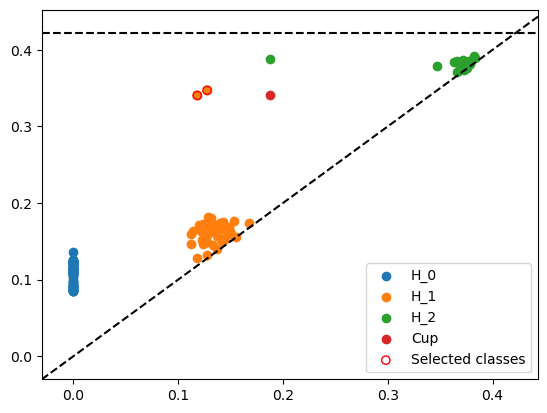

In [106]:
plt.scatter(diagrams[0][:,0], diagrams[0][:,1], label='H_0')
plt.scatter(diagrams[1][:,0], diagrams[1][:,1], label='H_1')
plt.scatter(diagrams[2][:,0], diagrams[2][:,1], label='H_2')

plt.scatter([death], [birth], label ='Cup')

chosen = diagrams[1][[H_1_persistence_sort_ind[-1], H_1_persistence_sort_ind[-2]],:]

plt.scatter(chosen[:,0], chosen[:,1], label='Selected classes', facecolors='none', edgecolors='r')

plt.legend(loc = 'lower right')

pad = .03

x_min = np.min([np.min(diagrams[0][:,0]), np.min(diagrams[1][:,0]), np.min(diagrams[2][:,0])])
x_max = np.max([np.max(diagrams[0][:,0]), np.max(diagrams[1][:,0]), np.max(diagrams[2][:,0])])

y_min = np.min([np.min(diagrams[0][:,1]), np.min(diagrams[1][:,1]), np.min(diagrams[2][:,1])])
y_max = np.max([np.nanmax(diagrams[0][:,1][diagrams[0][:,1] != np.inf]), 
                np.nanmax(diagrams[1][:,1][diagrams[1][:,1] != np.inf]), 
                np.nanmax(diagrams[2][:,1][diagrams[2][:,1] != np.inf])])

plt.plot(np.linspace(x_min - pad, x_max + 2*pad), np.linspace(x_min - pad, x_max + 2*pad), '--', c='black')
plt.hlines(y_max + pad, x_min - pad, x_max + 2*pad, linestyles='--')

plt.xlim(x_min - pad, x_max + 2*pad)
plt.ylim(0 - pad, y_max + 2*pad)

In [40]:
H_1_diagram

array([[0.16753867, 0.17404516],
       [0.15500678, 0.15620388],
       [0.15356393, 0.17672592],
       [0.15002529, 0.15899983],
       [0.14922684, 0.16286492],
       [0.14880216, 0.1689674 ],
       [0.14868473, 0.16065438],
       [0.14646076, 0.16158679],
       [0.14462027, 0.15338561],
       [0.14268489, 0.17473026],
       [0.1426826 , 0.15317981],
       [0.14213187, 0.16606091],
       [0.14150749, 0.15013301],
       [0.14145184, 0.1676937 ],
       [0.13990258, 0.1735381 ],
       [0.13720629, 0.14028378],
       [0.13715191, 0.16483819],
       [0.13707682, 0.15756033],
       [0.13698845, 0.1666965 ],
       [0.13643757, 0.16642404],
       [0.13639519, 0.16335867],
       [0.13548508, 0.16436443],
       [0.13348418, 0.16457459],
       [0.13342486, 0.14579068],
       [0.1327748 , 0.17247348],
       [0.13238275, 0.17344004],
       [0.13149193, 0.17370567],
       [0.13140976, 0.17086312],
       [0.13109839, 0.1732126 ],
       [0.13093369, 0.18073845],
       [0.